## Univariate and Multivariate series

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
macrodata_df = sm.datasets.macrodata.load_pandas().data

In [3]:
macrodata_df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## Series using Yahoo Finance

In [4]:
# %pip install yfinance

In [5]:
import yfinance as yf

In [6]:
# Tickers = ['VALE3.SA', 'PETR4.SA', 'ITUB4.SA', 'BBDC4.SA', 'ABEV3.SA', 'EUROUSD=X']
ticker = 'PETR4.SA'
df = yf.download(
    ticker,
    start = '2010-01-01',
    end = '2023-01-01',
)

/tmp/ipykernel_39992/2769434103.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
[*********************100%***********************]  1 of 1 completed


In [7]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA
Date,,,,,
2010-01-04,9.039498,9.039498,8.918390,8.949879,13303600
2010-01-05,8.961991,9.066144,8.913548,9.054034,21396400
2010-01-06,9.083098,9.083098,8.913547,8.913547,18720600
2010-01-07,8.998322,9.070987,8.978945,9.027388,10964600
2010-01-08,8.949882,9.056456,8.928082,9.000747,14624200


## Synthetic

In [8]:
from sklearn.datasets import make_regression

In [9]:

X, y = make_regression(
    n_samples = 100,
    n_features = 10,
    n_informative = 5,
    random_state = 42
)

## Exercise
### Univariate:
- Cancer
- CO2
- Engel
- Nile
- Strikes
- Sunspots

In [10]:
# Univariate datasets
cancer_df   = sm.datasets  .cancer.load_pandas().data
co2_df      = sm.datasets     .co2.load_pandas().data
engel_df    = sm.datasets   .engel.load_pandas().data
nile_df     = sm.datasets    .nile.load_pandas().data
strikes_df  = sm.datasets .strikes.load_pandas().data
sunspots_df = sm.datasets.sunspots.load_pandas().data

In [11]:
from statsmodels.tsa.stattools import acf

def ts_summary(data):
    '''
    Print Statistics and display plots for a given time series.
    '''
    
    # Convert to pandas Series if it's not already
    if not isinstance(data, pd.Series):
        data = pd.Series(data)
    
    # 1. Mean and Median
    mean_val = data.mean()
    median_val = data.median()
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    
    # 2. Min and Max
    min_val = data.min()
    max_val = data.max()
    print(f"Min: {min_val}")
    print(f"Max: {max_val}")
    
    # 3. Autocorrelation (lag=6, lag=12)
    acf_values_6 = acf(data, nlags=6)[1:]  # Skipping the zero lag
    acf_values_12 = acf(data, nlags=12)[1:]  # Skipping the zero lag
    print(f"Autocorrelation (lag=6): {acf_values_6}")
    print(f"Autocorrelation (lag=12): {acf_values_12}")
    
    # 4. Line Plot with Mean
    plt.figure(figsize=(12, 6))
    plt.plot(data, label='Time Series')
    plt.axhline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val}')
    plt.title('Time Series with Mean')
    plt.legend()
    plt.show()

    # 5. Histogram
    plt.figure(figsize=(12, 6))
    sns.histplot(data, kde=True, bins=30)
    plt.title('Histogram of Time Series')
    plt.show()

    # 6. Boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data)
    plt.title('Boxplot of Time Series')
    plt.show()


#### 1/6 Cancer

In [12]:
cancer_df

,cancer,population
0,1.0,445.0
1,0.0,559.0
2,3.0,677.0
3,4.0,681.0
4,3.0,746.0
...,...,...
296,250.0,62931.0
297,267.0,63476.0
298,244.0,66676.0
299,248.0,74005.0


In [13]:
cancer_df.head()

,cancer,population
0,1.0,445.0
1,0.0,559.0
2,3.0,677.0
3,4.0,681.0
4,3.0,746.0


In [14]:
cancer_ts = cancer_df['cancer']
cancer_ts.head()

0    1.0
1    0.0
2    3.0
3    4.0
4    3.0
Name: cancer, dtype: float64

Mean: 39.857142857142854
Median: 22.0
Min: 0.0
Max: 360.0
Autocorrelation (lag=6): [0.87104993 0.84081983 0.80274891 0.76302665 0.71504213 0.68934261]
Autocorrelation (lag=12): [0.87104993 0.84081983 0.80274891 0.76302665 0.71504213 0.68934261
 0.65807501 0.58829179 0.56814204 0.54262119 0.5381241  0.49541596]


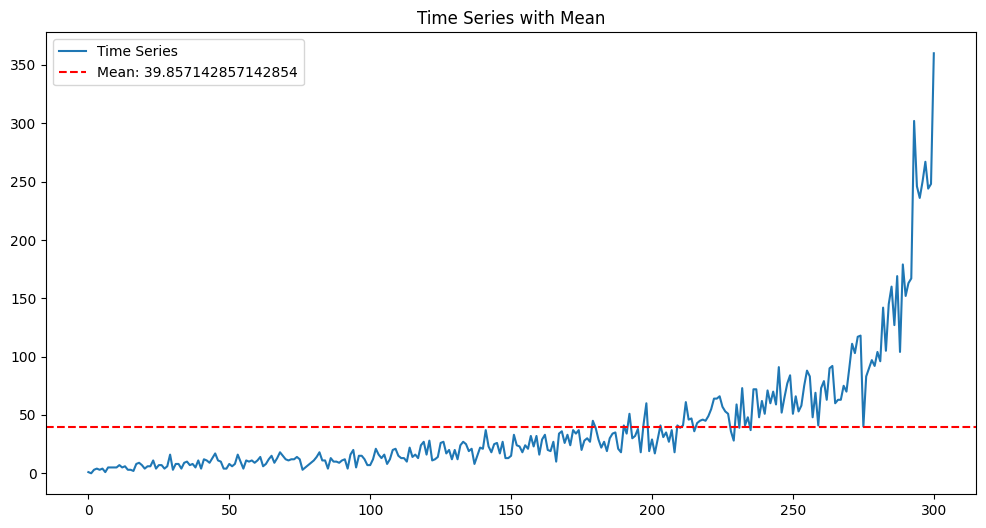

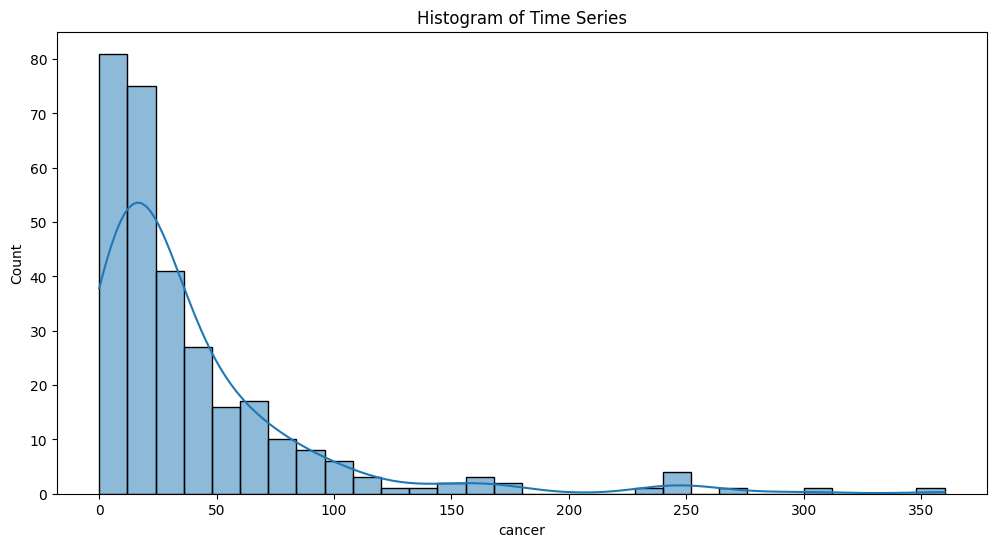

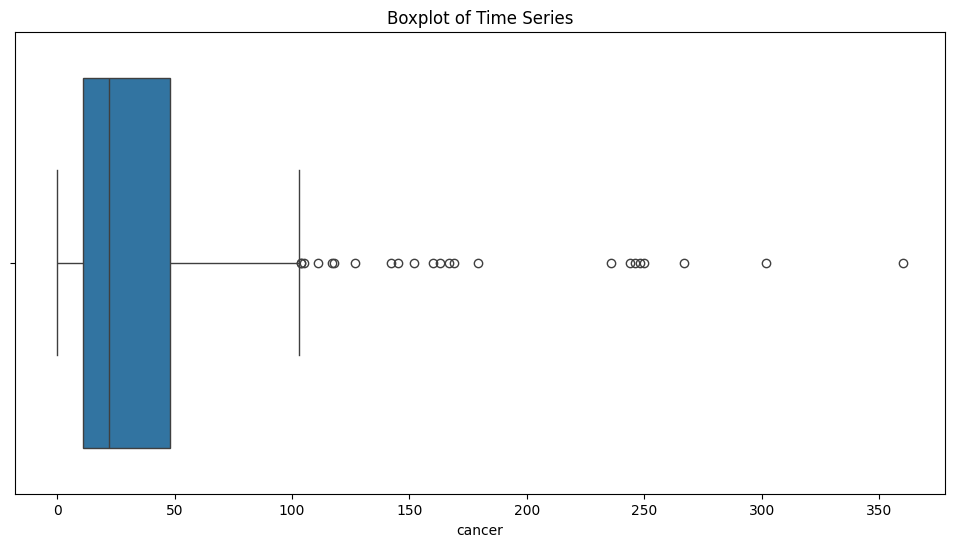

In [15]:
ts_summary(cancer_ts)

In [16]:
cancer_ts[cancer_ts == np.nan] 

Series([], Name: cancer, dtype: float64)

#### 2/6 CO2

In [17]:
co2_df.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [18]:
# First, ensure the index is properly formatted as datetime
co2_df.index = pd.to_datetime(co2_df.index)

# Now you can work with it as a time series
co2_ts = co2_df['co2']

# Verify the time series
print(co2_ts.head())
print(f"\nTime series range: {co2_ts.index.min()} to {co2_ts.index.max()}")
print(f"Frequency: {co2_ts.index.freq}")

1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
Freq: W-SAT, Name: co2, dtype: float64

Time series range: 1958-03-29 00:00:00 to 2001-12-29 00:00:00
Frequency: <Week: weekday=5>


In [19]:
print(type(co2_ts))


<class 'pandas.core.series.Series'>


In [20]:
co2_ts.head()

1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
Freq: W-SAT, Name: co2, dtype: float64

In [21]:
co2_ts

1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
              ...  
2001-12-01    370.3
2001-12-08    370.8
2001-12-15    371.2
2001-12-22    371.3
2001-12-29    371.5
Freq: W-SAT, Name: co2, Length: 2284, dtype: float64

Mean: 340.1422471910112
Median: 338.3
Min: 313.0
Max: 373.9
Autocorrelation (lag=6): [nan nan nan nan nan nan]
Autocorrelation (lag=12): [nan nan nan nan nan nan nan nan nan nan nan nan]


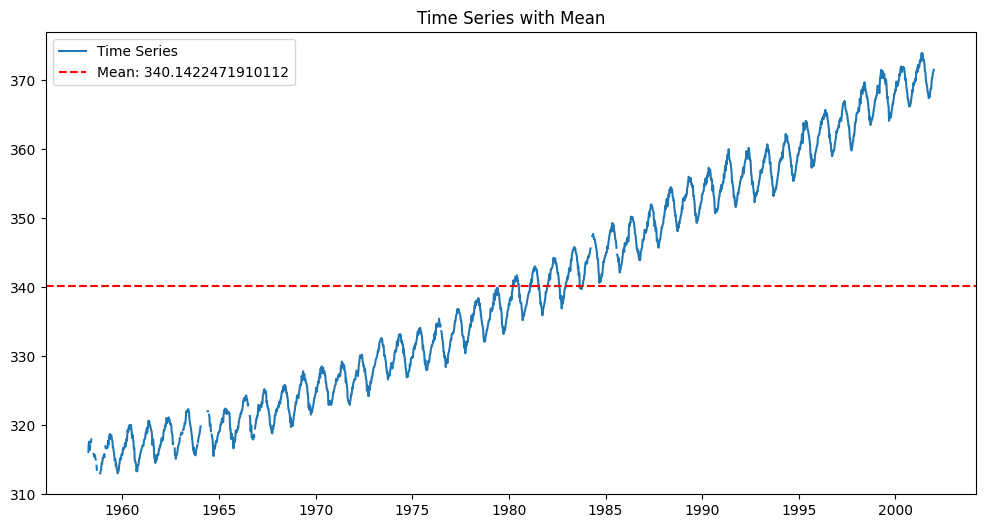

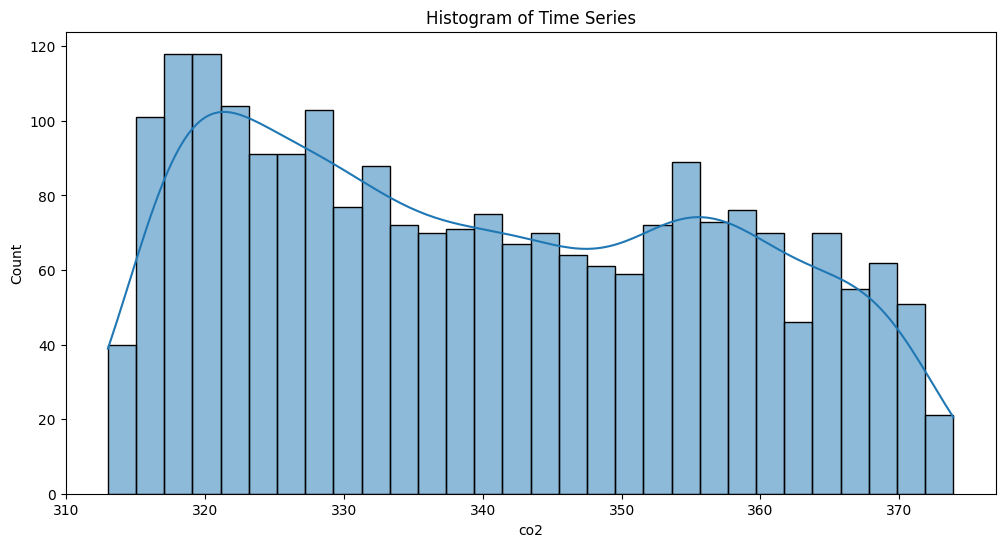

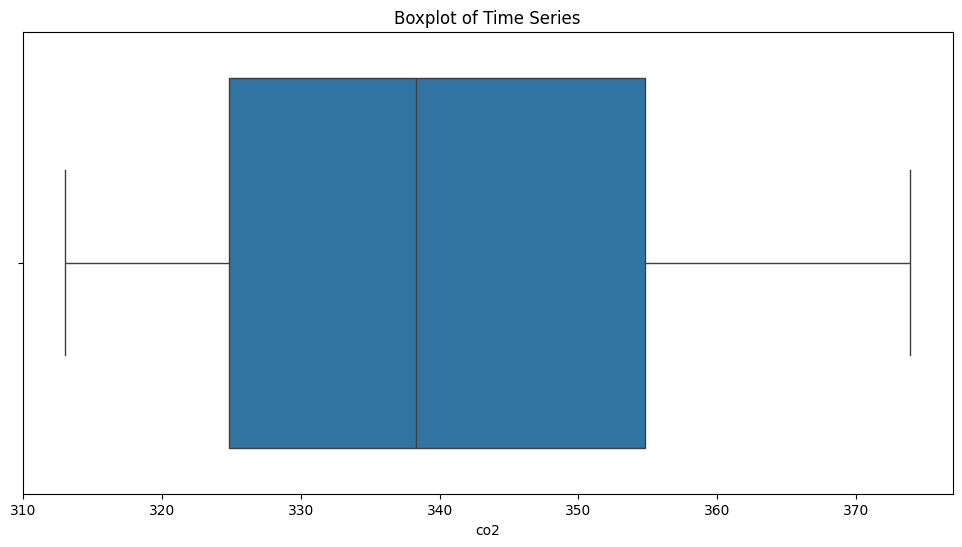

In [22]:
ts_summary(co2_ts)

### Multivariate:
> Choose 6 with more than 500 observations. Else create synthetyze the remaining ones.

In [23]:
# Multivariate datasets
